In [116]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform
from scipy.stats import expon
import pandas as pd

# Inverse transform sampling

Inverse transform sampling (also known as inversion sampling, the inverse probability integral transform, the inverse transformation method, or the Smirnov transform) is a basic method for pseudo-random number sampling, i.e., for generating sample numbers at random from any probability distribution given its cumulative distribution function.

Inverse transformation sampling takes uniform samples of a number $u$ between 0 and 1, interpreted as a probability, and then returns the smallest number $x \in \mathbb{R}$ such that $F(x) \geq u$ for the cumulative distribution function $F$ of a random variable. $X_i = F^{-1} (U_i)$

## Exponential distribution

For exponential distribution 

$F(x) = 1 - e ^{-x / \theta}$

$F^{-1}(U) = - \theta \ln(1 - U)$

Generate exponential distributed random variables using inverse transform given the scale and number of random variables and plot them.

In [70]:
def exponential_inverse_trans(n = 1, scale = 1, plot = False):

    U = uniform.rvs(size = n)
    X = - scale * np.log(1 - U)
    actual = expon.rvs(size = n, scale = scale)
    
    if plot:
        plt.figure(figsize = (4, 3))
        plt.hist(X, bins = 50, alpha = 0.5, label = "Generated r.v.")
        plt.hist(actual, bins = 50, alpha = 0.5, label = "Actual r.v.")
        plt.title("Generated vs Actual %i Exponential Random Variables, scale = %.1f" %(n, scale))
        plt.legend()
        plt.show()
    return X

Generate for different number of random variables

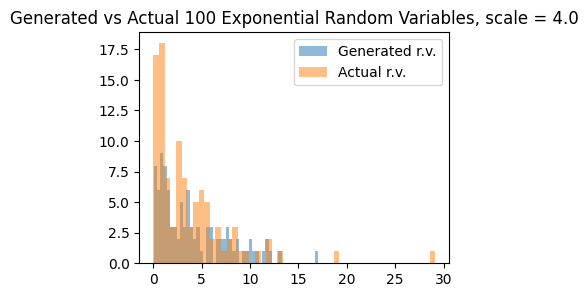

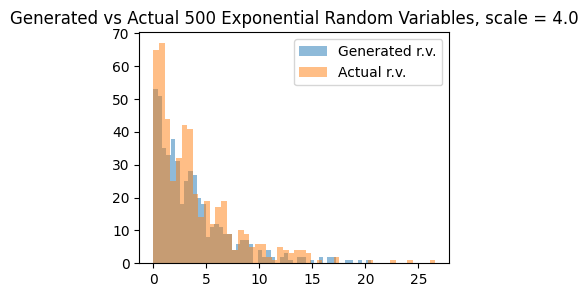

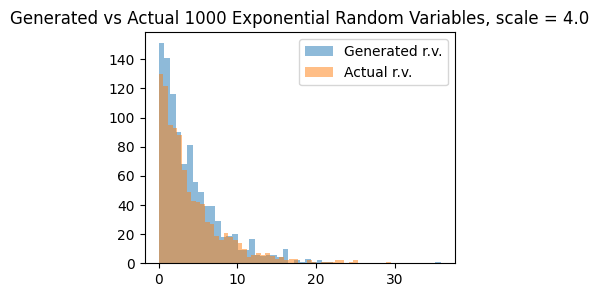

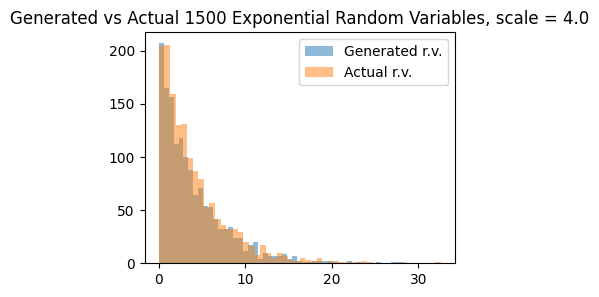

In [71]:
exp1 = exponential_inverse_trans(n = 100, scale = 4, plot = True)
exp2 = exponential_inverse_trans(n = 500, scale = 4, plot = True)
exp3 = exponential_inverse_trans(n = 1000, scale = 4, plot = True)
exp4 = exponential_inverse_trans(n = 1500, scale = 4, plot = True)

Generate for different scale

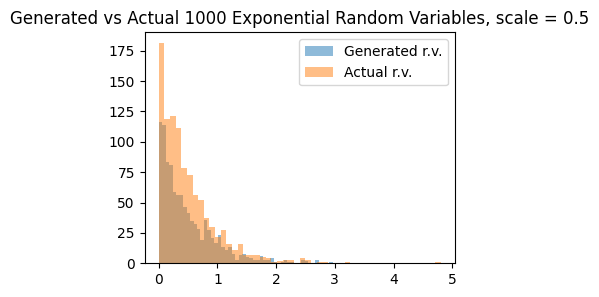

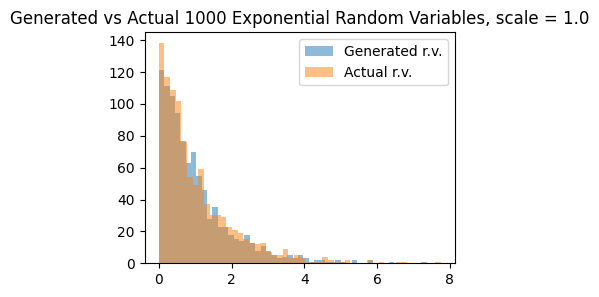

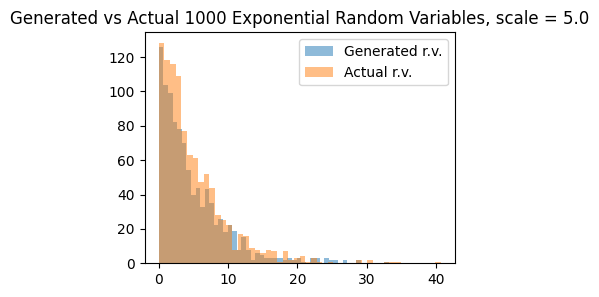

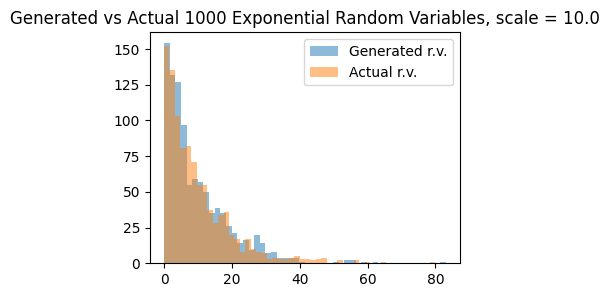

In [72]:
exp5 = exponential_inverse_trans(n = 1000, scale = 0.5, plot = True)
exp6 = exponential_inverse_trans(n = 1000, scale = 1, plot = True)
exp7 = exponential_inverse_trans(n = 1000, scale = 5, plot = True)
exp8 = exponential_inverse_trans(n = 1000, scale = 10, plot = True)

## Pareto distribution

For Pareto distribution 

$F(x) = 1 - \left(\frac{\lambda}{x} \right)^{\alpha}$

$F^{-1}(U) = \lambda (1-U)^{-1/\alpha}$

Generate Pareto distributed random variables using inverse transform given the parameters $\lambda$, $\alpha$ and number of random variables and plot them.

In [73]:
def pareto_inverse_trans(n = 1, lamb = 1, alpha = 1, plot = False):
    U = uniform.rvs(size = n)
    X = lamb * (1 - U)**(- 1 / alpha)

    actual = (np.random.pareto(alpha, n) + 1) * lamb
    
    if plot:
        plt.figure(figsize = (4,3))
        plt.hist(X, bins = 50, alpha = 0.5, label = "Generated r.v.")
        plt.hist(actual, bins = 50, alpha = 0.5, label = "Actual r.v.")
        plt.title("Generated vs Actual %i Pareto Random Variables, \nlambda = %.1f, alpha = %.1f" %(n, lamb, alpha))
        plt.legend()
        plt.show()
        
    return X

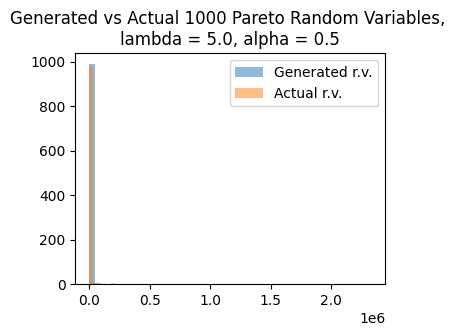

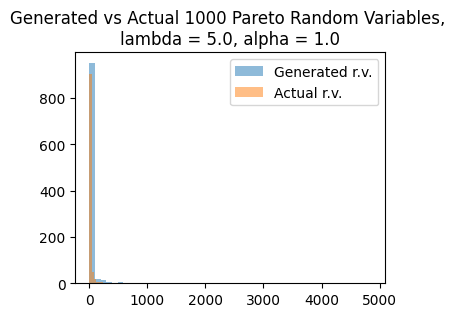

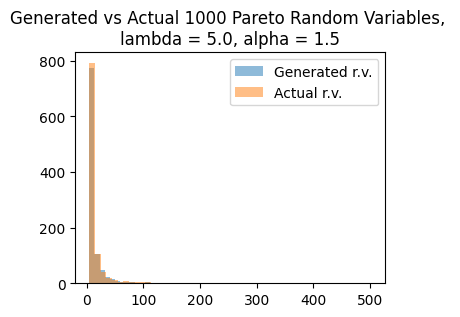

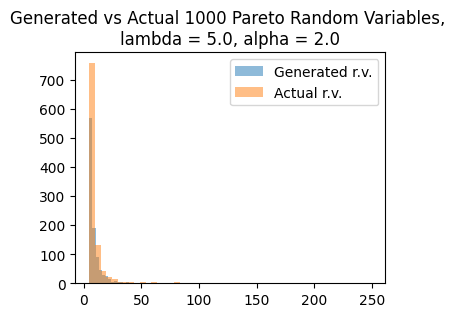

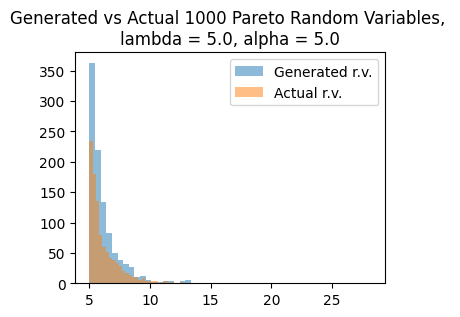

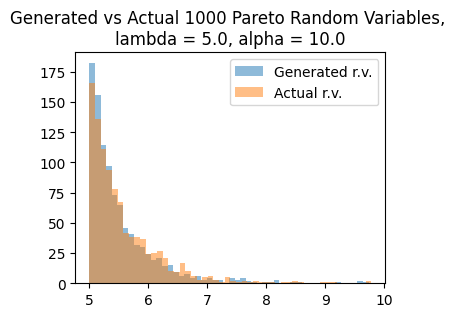

In [74]:
par_1 = pareto_inverse_trans(n = 1000, lamb = 5, alpha = 0.5, plot = True)
par_2 = pareto_inverse_trans(n = 1000, lamb = 5, alpha = 1, plot = True)
par_3 = pareto_inverse_trans(n = 1000, lamb = 5, alpha = 1.5, plot = True)
par_4 = pareto_inverse_trans(n = 1000, lamb = 5, alpha = 2, plot = True)
par_5 = pareto_inverse_trans(n = 1000, lamb = 5, alpha = 5, plot = True)
par_6 = pareto_inverse_trans(n = 1000, lamb = 5, alpha = 10, plot = True)

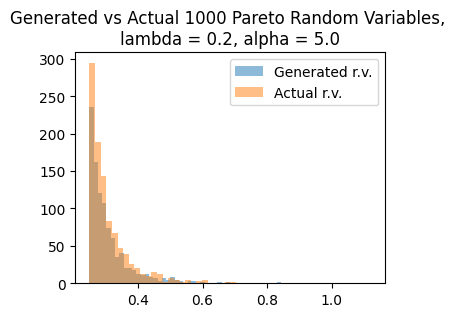

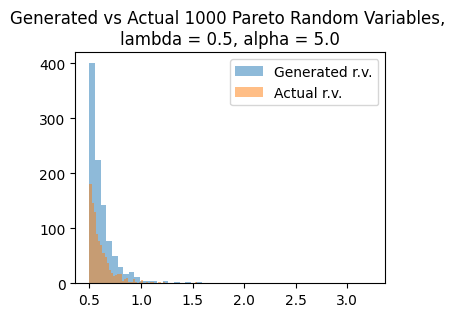

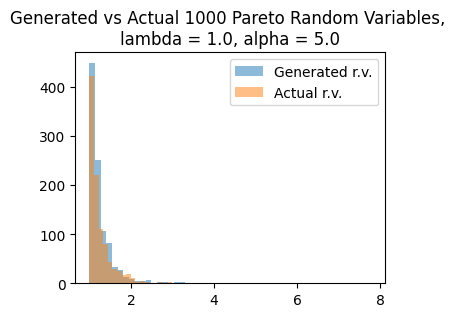

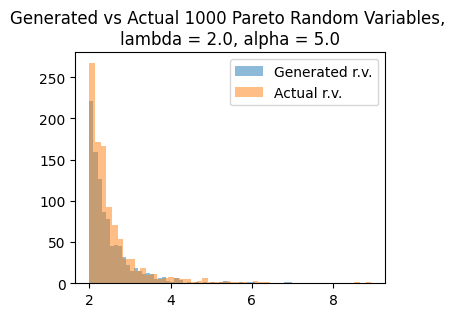

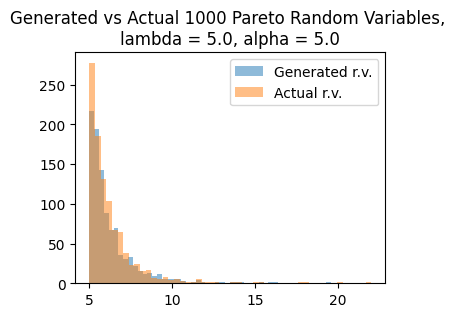

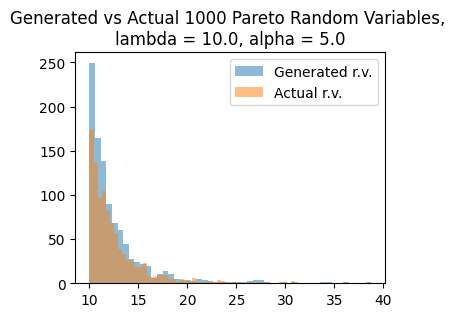

In [75]:
par_7 = pareto_inverse_trans(n = 1000, lamb = 0.25, alpha = 5, plot = True)
par_8 = pareto_inverse_trans(n = 1000, lamb = 0.5, alpha = 5, plot = True)
par_9 = pareto_inverse_trans(n = 1000, lamb = 1, alpha = 5, plot = True)
par_10 = pareto_inverse_trans(n = 1000, lamb = 2, alpha = 5, plot = True)
par_11 = pareto_inverse_trans(n = 1000, lamb = 5, alpha = 5, plot = True)
par_12 = pareto_inverse_trans(n = 1000, lamb = 10, alpha = 5, plot = True)

Compare mean of the distribution and theoretical mu.

$ 
\mu = 
\begin{cases}
\frac{\alpha \lambda}{\alpha - 1}, & \alpha > 1\\
\infty, & \alpha <= 1
\end{cases} 
$

In [117]:
def pareto_mean(n, lamb, alpha):
    pareto = pareto_inverse_trans(n, lamb, alpha)
    mean = pareto.mean()
    if alpha > 1:
        mu = alpha * lamb / (alpha - 1)
    else:
        mu = np.inf
    return round(mean, 3), round(mu, 3)
    # print(f"n = {n}, lambda = {lamb}, alpha = {alpha}\nmean = {mean}\nmu = {mu}")


In [118]:
n = 1000
lamb = [0.2, 0.5, 1, 2, 5, 10]
alpha = [0.2, 0.5, 2, 5, 10]

means = pd.DataFrame(columns = ['n', 'lambda', 'alpha', 'mean', 'mu'])

for l in lamb:
    for a in alpha:
        mean, mu = pareto_mean(n, l, a)
        means = pd.concat([means, pd.DataFrame([{'n':n, 
              'lambda':l,
              'alpha':a,
              'mean':mean,
              'mu':mu}])], ignore_index = True)
        # print('\n*********')
means

,n,lambda,alpha,mean,mu
0,1000,0.2,0.2,3.523261e+13,inf
1,1000,0.2,0.5,1.074420e+02,inf
2,1000,0.2,2.0,4.070000e-01,0.400
3,1000,0.2,5.0,2.490000e-01,0.250
4,1000,0.2,10.0,2.220000e-01,0.222
5,1000,0.5,0.2,1.611786e+19,inf
6,1000,0.5,0.5,2.459843e+03,inf
7,1000,0.5,2.0,1.042000e+00,1.000
8,1000,0.5,5.0,6.240000e-01,0.625
9,1000,0.5,10.0,5.530000e-01,0.556
